<a href="https://colab.research.google.com/github/Sylwiana/data-science-bootcamp/blob/main/regresja_pol48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from sklearn.linear_model import LinearRegression

In [ ]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
df.columns=['Size','Bedrooms','Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
df.dtypes

Size        int64
Bedrooms    int64
Price       int64
dtype: object

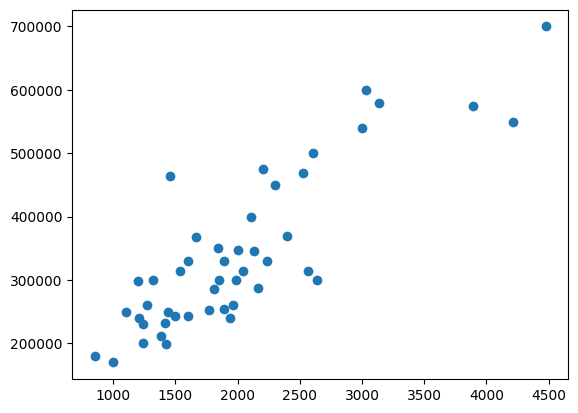

In [ ]:
plt.plot(df.Size,df.Price,'o')
plt.show()

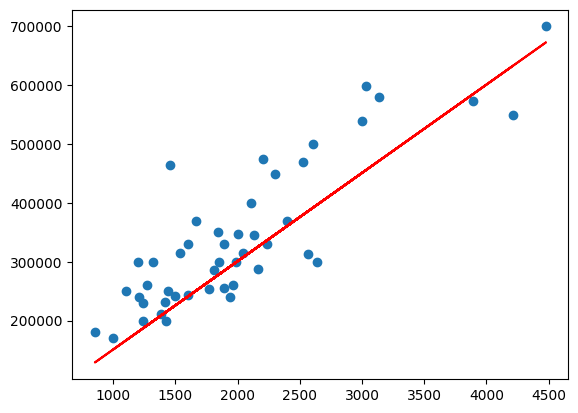

In [ ]:
plt.plot(df.Size,df.Price,'o')
plt.plot(df.Size,1000+df['Size']*150,'r')
plt.show()

In [ ]:
#gradient prosty

#przyporządkowanie zmiennej zależnej i niezależnej
X=df['Size'].values
y=df['Price'].values

X=np.column_stack(([1]*len(X),X)) # dodanie kolumny z jedynkami (wyraz wolny) technikalia

In [ ]:
from pandas.core.computation.pytables import Constant

def gradientDescent(X,y,theta,alpha,m,numIterations):
  '''
  param: X - zmienne niezalezne
  param: y - zmienna zalezna
  param: theta - macierz [Theta_0 czyli punkt przeciecia/wyraz wolny, Theta_1 czyli wspolczynnik modelu]
  param: alpha - wspolczynnik uczenia (jak duze kroki algorytm ma robic)
  param: m - liczba obserwacji
  param: numIterations - liczba iteracji naszego algorytmu, ile krokow ma zrobic nasz algorytm
  '''
  xTrans=X.transpose()                          #potrzebne do obliczenia gradientu
  cost_array=np.empty([numIterations,2])        # macierz, do ktorej bede zapisywac wartosci funkcji kosztu po kazdej iteracji
  for i in range(0,numIterations):
    hypothesis=np.dot(X,theta)                  # bierzemy kazdy x, mnozymy przez theta_1 i dodajemy theta_0 - przewidujemy cene domu
    loss=hypothesis-y                           #odleglosc kropek (obserwacji) od linii (regresji)
    cost=np.sum(loss**2)/(2*m)                  #wartosc funkcji kosztu
    print('Iteration %d | Cost %f'%(i,cost))
    cost_array[i][0]=i
    cost_array[i][1]=cost
    gradient=np.dot(xTrans,loss)/m              #pochodna czastkowa funkcji
    theta=theta-alpha*gradient
  return theta, cost_array

In [ ]:
m=len(X)
numIterations=200
alpha=0.00000005
theta=[10000,150] #theta0, theta1
theta,cost_array=gradientDescent(X,y,theta,alpha,m,numIterations)

Iteration 0 | Cost 2591505845.819149
Iteration 1 | Cost 2476133717.936910
Iteration 2 | Cost 2407914585.738894
Iteration 3 | Cost 2367576852.977928
Iteration 4 | Cost 2343725293.010190
Iteration 5 | Cost 2329621948.657735
Iteration 6 | Cost 2321282689.692098
Iteration 7 | Cost 2316351714.012118
Iteration 8 | Cost 2313436044.174388
Iteration 9 | Cost 2311712017.547451
Iteration 10 | Cost 2310692605.332905
Iteration 11 | Cost 2310089829.126229
Iteration 12 | Cost 2309733408.316209
Iteration 13 | Cost 2309522656.580189
Iteration 14 | Cost 2309398038.451989
Iteration 15 | Cost 2309324350.821198
Iteration 16 | Cost 2309280778.213246
Iteration 17 | Cost 2309255012.511695
Iteration 18 | Cost 2309239775.970868
Iteration 19 | Cost 2309230765.285505
Iteration 20 | Cost 2309225435.926441
Iteration 21 | Cost 2309222283.322586
Iteration 22 | Cost 2309220417.826381
Iteration 23 | Cost 2309219313.392373
Iteration 24 | Cost 2309218658.971749
Iteration 25 | Cost 2309218270.642446
Iteration 26 | Cost 23

In [ ]:
theta

array([10000.08674531,   161.05348881])

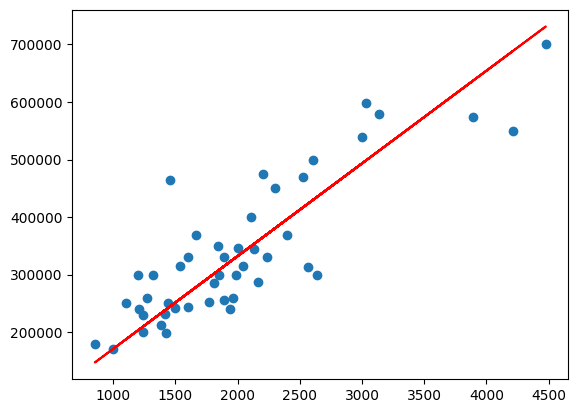

In [ ]:
plt.plot(df.Size,df.Price,'o')
plt.plot(df.Size,theta[0]+df['Size']*theta[1],'r')
plt.show()

In [ ]:
#sklearn

Regresja jednej zmiennej

In [ ]:
X=df[['Size']]
y=df['Price']

In [ ]:
X.values[:5]

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000]])

In [ ]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900])

In [ ]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
#theta_0 czyli wyraz wolny
model.intercept_

71270.49244872917

In [ ]:
#theta_1
model.coef_

array([134.52528772])

y=71270+134*x

Cena=71270+134*Powierzchnia mieszkania

In [ ]:
predict_data=np.array([[3200],[3700]])
predict_data

array([[3200],
       [3700]])

In [ ]:
model.predict(predict_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([501751.4131535 , 569014.05701362])

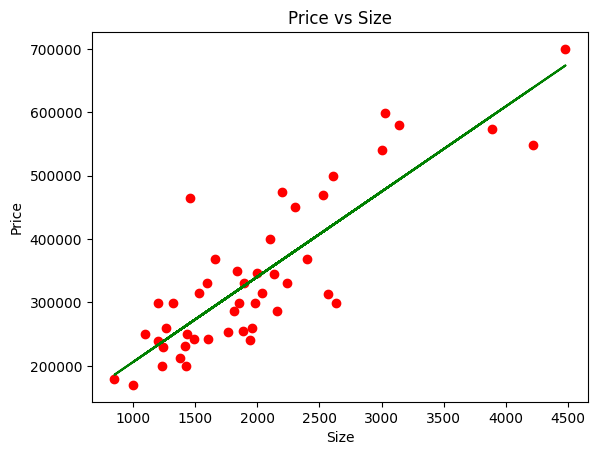

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X),color='green')
plt.title('Price vs Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

Regresja wielu zmiennych

In [ ]:
X=df[['Size','Bedrooms']]
y=df['Price']

In [ ]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
model.intercept_

89597.90954279754

In [ ]:
model.coef_

array([  139.21067402, -8738.01911233])

In [ ]:
predict_data=np.array([[3200,3],[3720,2],[5000,10]])
predict_data

array([[3200,    3],
       [3720,    2],
       [5000,   10]])

In [ ]:
model.predict(predict_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([508858.00906222, 589985.57866371, 698271.08850765])

ZADANIA

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import io

In [ ]:
#wczytywanie danych

url='https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df_zadanie=pd.read_csv(url)
df_zadanie.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_zadanie.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
#atemp-temperatura odczuwalana znormalizowana i wystandaryzowana (0-1)
#hum - wilgotność znormalizowana i wystandaryzowana (0-1)
#windspeed - prędkość wiatru znormalizowane i wystandaryzowane (0-1)
#cnt - liczba wypożyczeń rowerów

In [ ]:
#zad 1
#jako zmienną zależną wybieramy cnt (y)
#jako zmienną niezależną atemp (X)
X = df_zadanie[['atemp']]
y = df_zadanie['cnt']

In [ ]:
#zad 2 stwórz model regresji liniowej jednej zmiennej sklearn
model=LinearRegression()
model.fit(X,y)

LinearRegression()

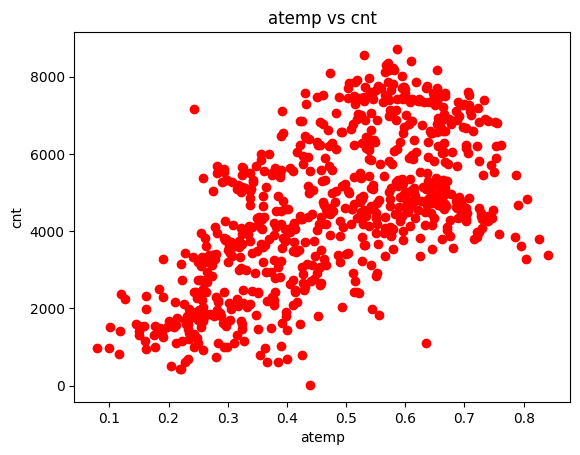

In [ ]:
#zad 3. stwórz wykres zależności atemp i cnt
plt.scatter(X,y,color='red')
# plt.plot(X, model.predict(X),color='green')
plt.title('atemp vs cnt')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.show()

In [ ]:
# zad 4. z tak (z zadania nr 2) wytrenowanego modelu wyznacz parametry theta
model.intercept_


945.8239810984901

In [ ]:
model.coef_/100


array([75.0183395])

In [ ]:
# zad 5. stwórz wykres zaleznosci atemp i cnt, do którego dodasz linię regresji na podstawie parametrów theta z zadania nr 4

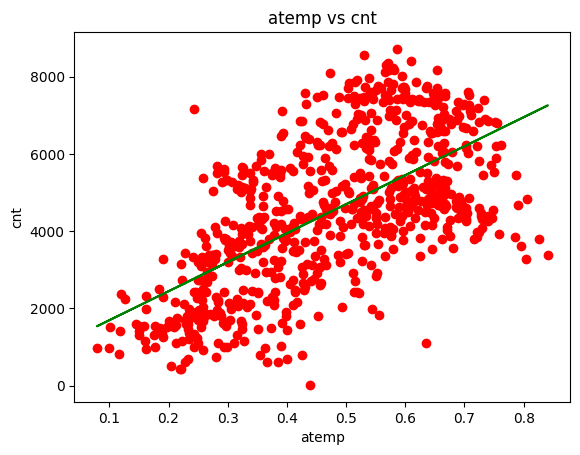

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X, model.predict(X),color='green')
plt.title('atemp vs cnt')
plt.xlabel('atemp')
plt.ylabel('cnt')
plt.show()

In [ ]:
# zad 6. regresja wielu zmiennych

#jako zmienną zależną wybieramy cnt - y

#jako zmienne niezależne atemp (temperatura), hum (wilgotność), windspeed (predkosc wiatru), workingday (czy dany dzien jest pracujacy) - X
X = df_zadanie[['atemp','hum','windspeed','workingday']]
y = df_zadanie['cnt']

In [ ]:
#zad 7. wytrenuj model regresji wielu zmiennych w sklearn
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
#zad 8. sprawdz wartosc wyrazu wolnego i wspolczynnikow regresji
print(model.intercept_)
print(model.coef_)
print(model.coef_/100)

3698.4373927964907
[ 7486.28341042 -3174.17132979 -4407.19069508   127.65517425]
[ 74.8628341  -31.7417133  -44.07190695   1.27655174]


In [ ]:
#zad 9. zinterpretuj wspolczynniki modelu oraz wyraz wolny
# wyraz wolny 3698 - Wyraz wolny oznacza liczbę wypożyczeń rowerów dla zerowych wartości wszystkich zmiennych niezależnych. Czyli dla najniższych wartości temperatury,
# wilgotności i prędkości wiatru z danego okresu pomiarowego oraz dla weekendów (workingday = 0) na podstawie modelu przewidujemy, że liczba wypożyczeń
# wynosi ok. 3700.

#7486 atemp - wraz ze wzrostem wystandaryzowanej temperatury o jednostkę liczba wypożyczeń rowerów rośnie o 7486
#-3174 hum - wraz ze wzrostem wystandaryzowanej wilgotności o jednostkę liczba wypożyczeń spada o 3174

#127 workingday - w przypadku dnia pracującego liczba wypożyczeń rowerów jest o 127 większa niż w weekend

In [ ]:
#zad 10. stworz predykcję ilości wypozyczonych rowerow w dzien, w ktorym atemp=0.5,hum=0.3,windspeed=0.25, byl to dzien pracujący
predict_data=np.array([[0.5, 0.3, 0.25, 1]])
# Z = [[0.5,0.3,0.25,1],[0.8,0.2,0.45,1]]
# model.predict(Z)
model.predict(predict_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5515.18519955])

Regresja wielomianowa

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)

In [ ]:
df.columns=['Size','Bedrooms','Price']

In [ ]:
X=df[['Size']]
y=df['Price']

In [ ]:
poly=PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X)
X_poly[:5]

array([[1.00000000e+00, 2.10400000e+03, 4.42681600e+06, 9.31402086e+09],
       [1.00000000e+00, 1.60000000e+03, 2.56000000e+06, 4.09600000e+09],
       [1.00000000e+00, 2.40000000e+03, 5.76000000e+06, 1.38240000e+10],
       [1.00000000e+00, 1.41600000e+03, 2.00505600e+06, 2.83915930e+09],
       [1.00000000e+00, 3.00000000e+03, 9.00000000e+06, 2.70000000e+10]])

In [ ]:
model=LinearRegression()
model.fit(X_poly,y)

LinearRegression()

In [ ]:
model.intercept_

236407.0358523208

In [ ]:
model.coef_

array([ 0.00000000e+00, -1.07855433e+02,  1.06190390e-01, -1.38299983e-05])

In [ ]:
predict_data=([[3200],[3700]])
predict_data

[[3200], [3700]]

In [ ]:
predict_data_poly=poly.transform(predict_data)
predict_data_poly

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.0000e+00, 3.2000e+03, 1.0240e+07, 3.2768e+10],
       [1.0000e+00, 3.7000e+03, 1.3690e+07, 5.0653e+10]])

In [ ]:
model.predict(predict_data_poly)

array([525477.86332531, 590557.47411122])

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

#tworzę sztuczny zbiór danych - 50 równych części w zakresie od minimalnej do maksymalnej wartości dla zmiennej Size
x_range=np.linspace(X['Size'].min(),X['Size'].max(),50)
#zmieniam x_range na wektor z listy (reshape), tak aby móc przerobić x (dodać wielomiany do 3 stopnia)
#oraz tworzę y - za pomocą funkcji predict
y_range=model.predict(poly.fit_transform(x_range.reshape(-1,1)))

fig=px.scatter(x=X['Size'],y=y,opacity=0.7)
fig.add_traces(go.Scatter(x=x_range,y=y_range,name='Polynomial Regression Fit'))
fig.show()